In [3]:
print ("hello")

hello


In [4]:
name = "San"
print(f"what is this {name}")

what is this San


In [2]:
name = input("What's your name?: ")
print(f"Hello {name}")

What's your name?:  santhosh


Hello santhosh


In [1]:
import pandas as pd

In [4]:
axis_df = pd.read_excel("~/Downloads/Axis-Data.xlsx")

In [5]:
axis_df

,Issue key,Created,Updated,Year,Custom field (Epic Link),Custom field (Epic Name),Custom field (Product),Project key,Project name,Project type,Project lead,Project description,Issue Type,Priority
0,MAX-5785,2020-06-25 11:17:00,2021-08-18 13:25:00,2020,MAX-6137,NaN,Phygital,MAX,mAXImuS,software,270002,Retail lending platform,Story,Highest
1,MAX-6273,2020-08-14 09:29:00,2022-07-20 15:14:00,2020,MAX-6137,NaN,PL,MAX,mAXImuS,software,270002,Retail lending platform,Story,Highest
2,MAX-6446,2020-09-01 11:12:00,2022-03-16 16:51:00,2020,MAX-6107,NaN,PL,MAX,mAXImuS,software,270002,Retail lending platform,Story,Highest
3,MAX-6560,2020-09-10 08:19:00,2022-05-02 15:24:00,2020,MAX-6137,NaN,Phygital,MAX,mAXImuS,software,270002,Retail lending platform,Story,Highest
4,MAX-6742,2020-09-28 09:35:00,2021-08-18 13:25:00,2020,MAX-6107,NaN,PL,MAX,mAXImuS,software,270002,Retail lending platform,Story,Highest
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
529,CCM-2697,2022-11-11 14:42:00,2022-11-25 20:06:00,2022,CCM-2203,NaN,Credit Card,CCM,Credit Cards,software,adiganesh.k,Cards & Payments\n \n\n IT Project modified to...,Story,Critical
530,CCM-2698,2022-11-11 14:44:00,2022-11-28 09:57:00,2022,CCM-2203,NaN,Credit Card,CCM,Credit Cards,software,adiganesh.k,Cards & Payments\n \n\n IT Project modified to...,Story,Critical
531,CCM-2722,2022-11-22 16:20:00,2022-11-23 11:20:00,2022,NaN,NaN,Credit Card,CCM,Credit Cards,software,adiganesh.k,Cards & Payments\n \n\n IT Project modified to...,Task,Critical
532,CCM-2725,2022-11-23 16:25:00,2022-11-28 11:30:00,2022,CCM-2447,NaN,Credit Card,CCM,Credit Cards,software,adiganesh.k,Cards & Payments\n \n\n IT Project modified to...,Bug,Critical


In [20]:
axis_df.pivot_table(index="Priority", columns="Custom field (Product)", values="Created", fill_value=0, aggfunc="count")

Custom field (Product),AL,AL Top Up,Credit Card,ETB API,HL,HL Adoption,KTB,LAS,OD,PL,Phygital,Platform,Testing,Two Wheeler
Priority,,,,,,,,,,,,,,
Critical,31,4,84,0,9,0,0,13,4,40,6,38,0,2
High,7,0,3,5,4,0,0,0,4,9,1,9,0,0
Highest,10,1,0,11,6,2,4,0,5,34,6,15,1,1
Low,1,0,10,0,2,0,0,0,0,5,0,2,0,0
Medium,11,7,27,5,8,13,2,2,5,24,1,28,1,0


In [24]:
incidents_by_year=axis_df.pivot_table(index="Priority", columns="Year", values="Custom field (Product)", aggfunc="count")

In [89]:
axis_df.pivot_table(index="Priority", columns="Year", values="Custom field (Product)", aggfunc=[len])

len              
Year      2020   2021   2022
Priority                    
Critical   NaN  112.0  129.0
High       1.0   30.0   11.0
Highest   12.0   83.0    1.0
Low        NaN   17.0    3.0
Medium     2.0  100.0   33.0

In [136]:
incidents_by_year = axis_df.pivot_table(index="Year", columns="Priority", values="Custom field (Product)", fill_value=0, aggfunc="size")

In [139]:
incidents_by_year = axis_df.pivot_table(index="Year", columns="Priority", values="Custom field (Product)", fill_value=0, aggfunc=[len])

In [140]:
incidents_by_year

len                        
Priority Critical High Highest Low Medium
Year                                     
2020            0    1      12   0      2
2021          112   30      83  17    100
2022          129   11       1   3     33

In [141]:
incidents_by_year.columns

MultiIndex([('len', 'Critical'),
            ('len',     'High'),
            ('len',  'Highest'),
            ('len',      'Low'),
            ('len',   'Medium')],
           names=[None, 'Priority'])

In [98]:
incidents_by_year[('len', 'Critical')].value_counts()

0      1
112    1
129    1
Name: (len, Critical), dtype: int64

In [121]:
incidents_by_year.query('Year == 2022').value_counts()

(len, Critical)  (len, High)  (len, Highest)  (len, Low)  (len, Medium)  (len, Total)
129              11           1               3           33             176             1
dtype: int64

In [144]:
incidents_by_year = axis_df.pivot_table(index="Year", columns="Priority", values="Custom field (Product)", fill_value=0, aggfunc=[len], margins=True, margins_name="Total")

In [145]:
incidents_by_year

len                              
Priority Critical High Highest Low Medium Total
Year                                           
2020            0    1      12   0      2    15
2021          112   30      83  17    100   332
2022          129   11       1   3     33   176
Total         231   42      96  20    134   523

In [154]:
incidents_by_year.r

MultiIndex([('len', 'Critical'),
            ('len',     'High'),
            ('len',  'Highest'),
            ('len',      'Low'),
            ('len',   'Medium'),
            ('len',    'Total')],
           names=[None, 'Priority'])

In [158]:
incidents_by_year.loc[:, incidents_by_year.columns != ('len',    'Total')]

len                        
Priority Critical High Highest Low Medium
Year                                     
2020            0    1      12   0      2
2021          112   30      83  17    100
2022          129   11       1   3     33
Total         231   42      96  20    134

<AxesSubplot:ylabel='(len, Total)'>

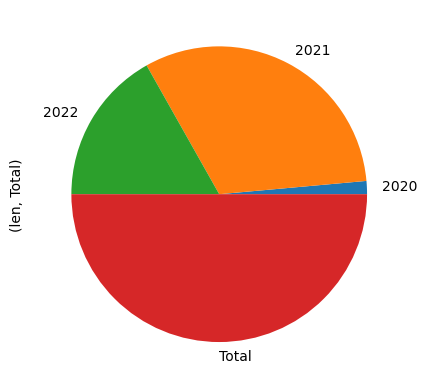

In [157]:
incidents_by_year[('len',    'Total')].plot(kind='pie')

<AxesSubplot:title={'center':'Incidents by Prorities & Year'}, xlabel='Year'>

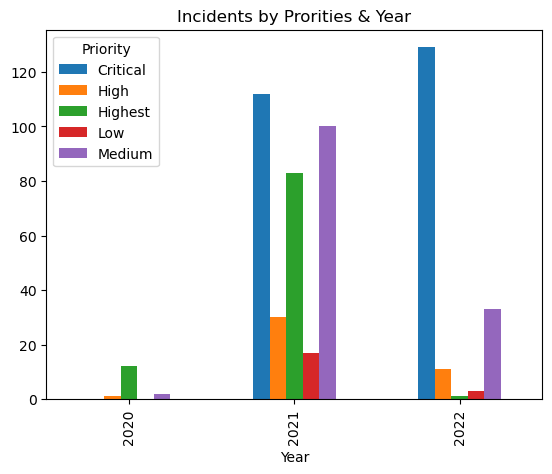

In [138]:
incidents_by_year.plot(kind="bar", title="Incidents by Prorities & Year")

In [63]:
incidents_by_prod = axis_df.pivot_table(index="Custom field (Product)", columns="Priority", values="Year", fill_value=0, aggfunc=[len], margins=True, margins_name="Total")

In [64]:
incidents_by_prod

len                              
Priority               Critical High Highest Low Medium Total
Custom field (Product)                                       
AL                           31    7      10   1     11    60
AL Top Up                     4    0       1   0      7    12
Credit Card                  84    3       0  10     27   124
ETB API                       0    5      11   0      5    21
HL                            9    4       6   2      8    29
HL Adoption                   0    0       2   0     13    15
KTB                           0    0       4   0      2     6
LAS                          13    0       0   0      2    15
OD                            4    4       5   0      5    18
PL                           40    9      34   5     24   112
Phygital                      6    1       6   0      1    14
Platform                     38    9      15   2     28    92
Testing                       0    0       1   0      1     2
Two Wheeler                   2    0       1   0      0     3
Total                       231   42      96  20    134   523

In [66]:
incidents_by_prod = axis_df.pivot_table(index=["Year", "Custom field (Product)"], columns="Priority", values="Created", fill_value=0, aggfunc=[len], margins=True, margins_name="Total")

In [67]:
incidents_by_prod

len                              
Priority                     Critical High Highest Low Medium Total
Year  Custom field (Product)                                       
2020  AL                            0    0       3   0      0     3
      ETB API                       0    1       0   0      1     2
      PL                            0    0       6   0      1     7
      Phygital                      0    0       2   0      0     2
      Platform                      0    0       1   0      0     1
2021  AL                           12    4       7   1      9    33
      AL Top Up                     3    0       1   0      7    11
      Credit Card                  41    2       0   9     17    69
      ETB API                       0    3      11   0      4    18
      HL                            5    4       5   1      4    19
      HL Adoption                   0    0       2   0     13    15
      KTB                           0    0       4   0      2     6
      OD                            1    4       5   0      5    15
      PL                           20    6      28   4     18    76
      Phygital                      3    1       4   0      1     9
      Platform                     18    6      14   2     18    58
      Testing                       0    0       1   0      1     2
      Two Wheeler                   0    0       1   0      0     1
2022  AL                           19    3       0   0      2    24
      AL Top Up                     1    0       0   0      0     1
      Credit Card                  43    1       0   1     10    55
      ETB API                       0    1       0   0      0     1
      HL                            4    0       1   1      4    10
      LAS                          13    0       0   0      2    15
      OD                            3    0       0   0      0     3
      PL                           20    3       0   1      5    29
      Phygital                      3    0       0   0      0     3
      Platform                     20    3       0   0     10    33
      Two Wheeler                   2    0       0   0      0     2
Total                             231   42      96  20    134   523

In [220]:
incidents_by_year = axis_df.pivot_table(index="Year", columns="Priority", values="Custom field (Product)", fill_value=0, aggfunc="size")

In [282]:
incidents_by_year = axis_df.pivot_table(index="Priority", columns="Year", values="Custom field (Product)", fill_value=0, aggfunc="size")

In [283]:
incidents_by_year

Year,2020,2021,2022
Priority,,,
Critical,0,112,129
High,1,30,11
Highest,12,83,1
Low,0,17,3
Medium,2,100,33


In [253]:
incidents_by_year.columns

Int64Index([2020, 2021, 2022], dtype='int64', name='Year')

<AxesSubplot:xlabel='Priority'>

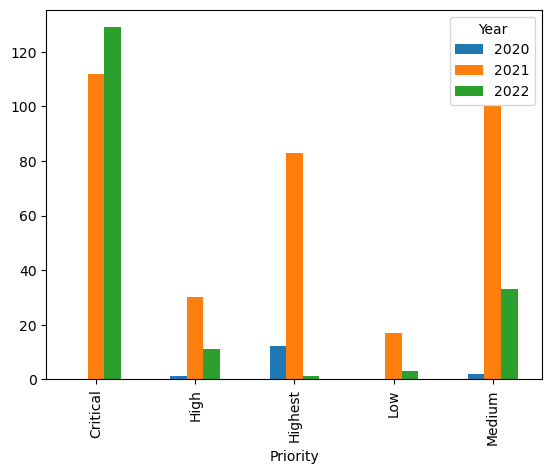

In [284]:
incidents_by_year.plot(kind='bar')

In [279]:
incidents_by_year.keys()

Int64Index([2020, 2021, 2022], dtype='int64', name='Year')

In [285]:
# incidents_by_year['Incidents'] = incidents_by_year[['Critical','High', 'Highest', 'Low', 'Medium']].sum(axis=1)
incidents_by_year.loc['Incidents'] = incidents_by_year[incidents_by_year.keys()].sum()
incidents_by_year.fillna('',inplace=True)

In [286]:
incidents_by_year

Year,2020,2021,2022
Priority,,,
Critical,0,112,129
High,1,30,11
Highest,12,83,1
Low,0,17,3
Medium,2,100,33
Incidents,15,342,177


<AxesSubplot:xlabel='Priority'>

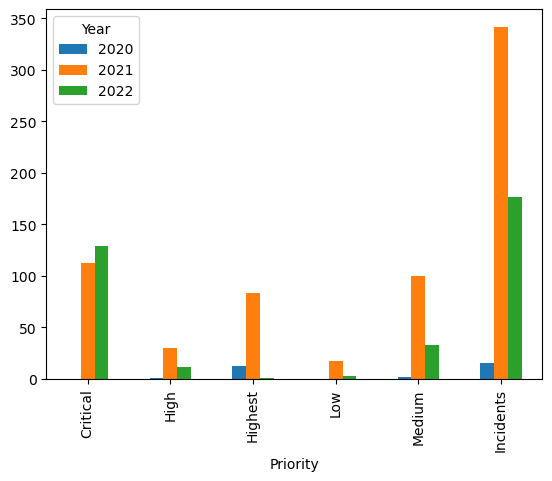

In [287]:
incidents_by_year.plot(kind='bar')

In [288]:
incidents_by_year.iloc[-1:]

Year,2020,2021,2022
Priority,,,
Incidents,15,342,177


<AxesSubplot:xlabel='Priority'>

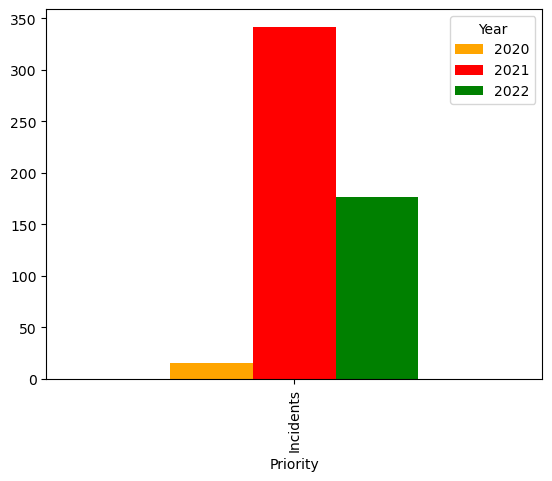

In [293]:
incidents_by_year.iloc[-1:].plot(kind='bar', color={"green", "orange", "red"})

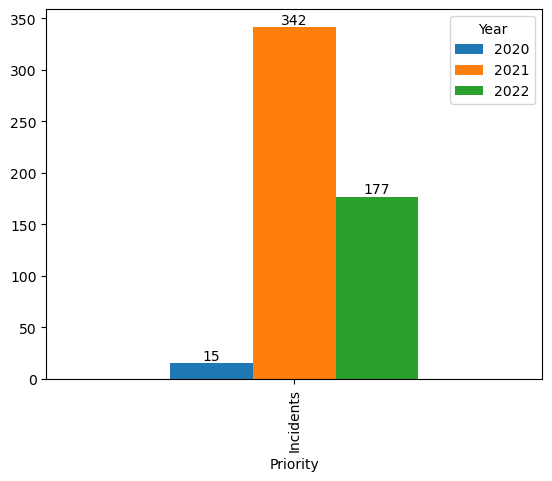

In [296]:
ax = incidents_by_year.iloc[-1:].plot.bar()
for container in ax.containers:
    ax.bar_label(container)

In [242]:
table = incidents_by_year.loc[:, incidents_by_year.columns.isin(['Year', 'Incidents'])]

In [243]:
table

Year
Priority
Critical
High
Highest
Low
Medium
Total
Incidents


<AxesSubplot:xlabel='Year'>

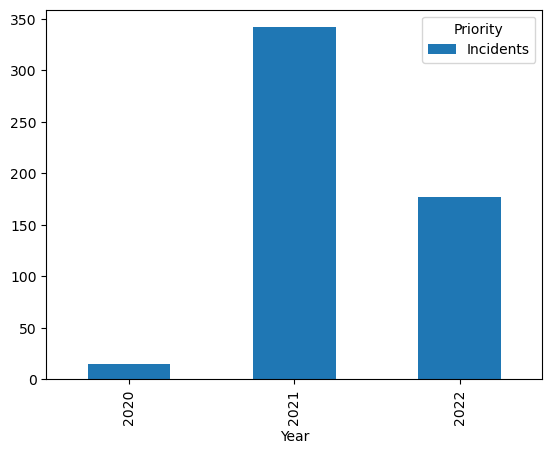

In [228]:
table.plot(kind='bar')

In [215]:
type(table)

pandas.core.frame.DataFrame

In [189]:
table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3 entries, 2020 to 2022
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Incidents  3 non-null      int64
dtypes: int64(1)
memory usage: 48.0 bytes


In [193]:
table.columns

Index(['Incidents'], dtype='object', name='Priority')

In [198]:
table.sort_values(by = "Year")

Priority,Incidents
Year,
2020,15
2021,342
2022,177


<AxesSubplot:ylabel='Year'>

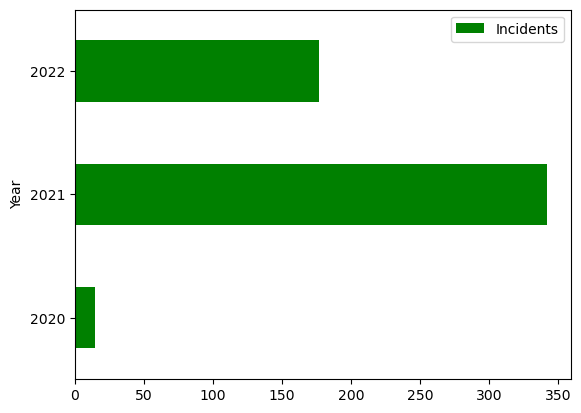

In [199]:
table.sort_values(by = "Year").plot.barh(y='Incidents', color={"green"})